# This notebook plots REMA elevation changes with different grounding lines


In [22]:

import rasterio as rio
import rasterio.mask
import fiona
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon, Point
import numpy as np
import os
import sys
import glob
import matplotlib.pyplot as plt
from scipy import interpolate

from shapely.geometry import LineString


In [ ]:
gis_path ="/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
REMA_filepath = '/Volumes/arc_02/whitefar/DATA/REMOTE_SENSING/REMA_STRIPES/'
indicies_which_intersect = np.loadtxt("/Users/home/whitefar/DATA/REMOTE_SENSING/REMA_2m_strips/indicies_which_intersect.txt").astype(int).tolist()
lines_files_paths = glob.glob(os.path.join(gis_path,"**.gpkg"),recursive=True)
lines_names = [os.path.splitext(os.path.split(line_file_path )[1])[0] for line_file_path in lines_files_paths]
REMA_shapes_df = gpd.read_file('/Users/home/whitefar/DATA/REMOTE_SENSING/REMA_2m_strips/REMA_Strip_Index_Rel1.shp',crs="EPSG:3031").iloc[indicies_which_intersect]

In [2]:
#open the dictionary associating each line with REMA strips
with open(gis_path+'REMAnid_over_radarlines.txt','r') as f:
    ld = eval(f.read())


line_index = [x for x in zip(lines_names,range(len(lines_names)))]

#print the line names with an index
print(lines_names)

['lineAPRESdown', 'left1415', 'left810', 'line8', 'line6', 'line11', 'right68', 'right13', 'lineback2camp', 'left02', 'line4', 'line2', 'right24', 'line0bKIS1', 'line7', 'left79', 'lineupchan', 'right1112', 'linedownchan', 'left46', 'left1011', 'line3', 'right910', 'line14', 'line13', 'line7p5', 'lineseis34', 'left35', 'line9', 'line7p75', 'left1213', 'line10', 'line12', 'line0KIS1', 'line0', 'right1314', 'lineAPREScross', 'line5', 'line7p25', 'line1']


In [3]:
df = gpd.read_file('/Users/home/whitefar/DATA/REMOTE_SENSING/REMA_2m_strips/REMA_Strip_Index_Rel1.shp')

# Look at line 7 with different grounding lines

## We can take the full tifs and look at diffs



In [4]:
kis2 = [-380737.537026,-724683.311299]
line_name = 'line7'

In [5]:
study_area = gpd.read_file('/Users/home/whitefar/DATA/FIELD_ANT_19/PRE_FIELD/KISRoutes/study_area_buffer.shp')

measures_gl = gpd.read_file('/Users/home/whitefar/DATA/Quantarctica3/Glaciology/MEaSUREs Antarctic Boundaries/GroundingLine_Antarctica_v2.shp').intersection(study_area)

asaid_hl = gpd.read_file('/Users/home/whitefar/DATA/Quantarctica3/Glaciology/ASAID/ASAID_HydrostaticLine_Continent.shp').intersects(study_area)

asaid_gl = gpd.read_file('/Users/home/whitefar/DATA/Quantarctica3/Glaciology/ASAID/ASAID_GroundingLine_Continent.shp').intersects(study_area)

In [6]:
measures_gl_arr = np.array(measures_gl.geometry.iloc[0].exterior.coords)

In [7]:
print(any(asaid_gl),any(asaid_hl))

False False


The asaid grounding lines are not on the same region of antarctica.

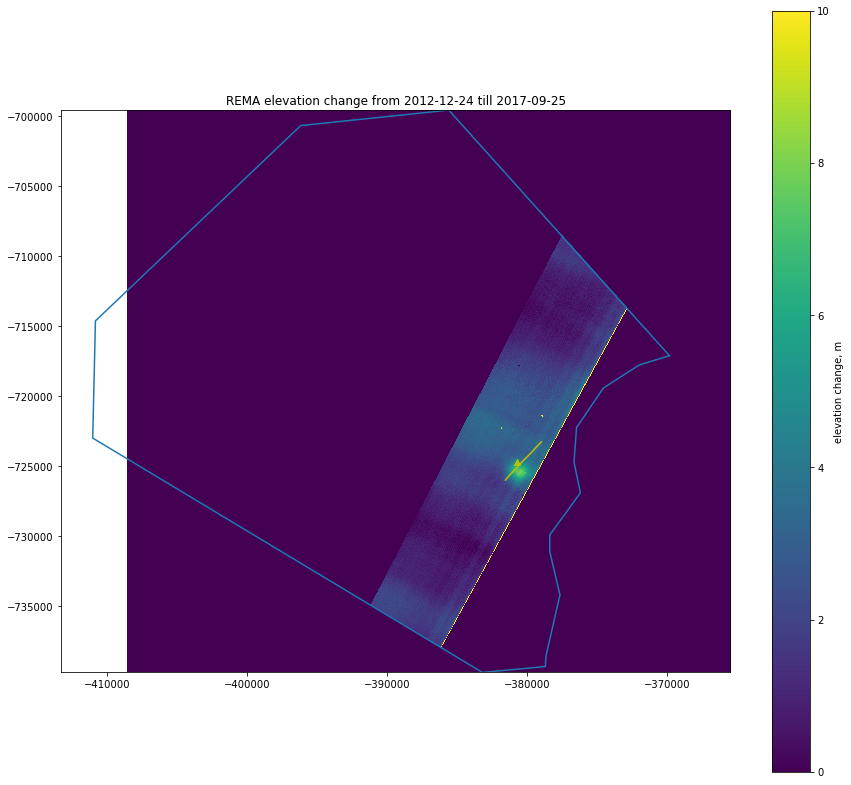

In [8]:
nid1 = 159202
nid2 = 145074
v=[0,10]
path = f"/Volumes/arc_02/whitefar/DATA/REMOTE_SENSING/REMA_STRIPES/DIFFERENCES/REMA_{nid1}-{nid2}_diff.tif"
image = rio.open(path)
extent = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
gdf = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                    +line_name+".shp")
f = df.loc[nid1].acquisitio
t =df.loc[nid2].acquisitio
xmin,xmax = [gdf.geometry.x.to_numpy().min(),gdf.geometry.x.to_numpy().max()]
ymin,ymax = [gdf.geometry.y.to_numpy().min(),gdf.geometry.y.to_numpy().max()]
plt.figure(figsize=(15,14))
plt.imshow(image.read(1),extent=extent, vmin=v[0],vmax=v[1])
# plt.xlim([xmin-1000, xmax])
# plt.ylim([ymin-1000,ymax])
cb = plt.colorbar()
plt.plot(gdf.geometry.x,gdf.geometry.y,'y')
plt.plot(kis2[0],kis2[1],'y^')
plt.title(f'REMA elevation change from {f} till {t}')
cb.set_label('elevation change, m')
plt.plot(measures_gl_arr[:,0],measures_gl_arr[:,1])

The measures grounding line passes through lower down the channel

In [9]:

asaid_hl = gpd.read_file('/Users/home/whitefar/DATA/Quantarctica3/Glaciology/ASAID/ASAID_HydrostaticLine_Continent.shp')

asaid_gl = gpd.read_file('/Users/home/whitefar/DATA/Quantarctica3/Glaciology/ASAID/ASAID_GroundingLine_Continent.shp')

In [10]:
study_arr = np.array(study_area.geometry.iloc[0].exterior.coords)

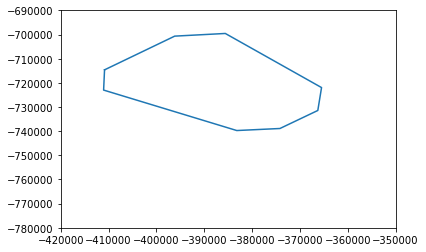

In [11]:
plt.plot(study_arr[:,0],study_arr[:,1])
plt.xlim([-420000, -350000])
plt.ylim([-780000,-690000])
plt.plot(asaid_hl.geometry.iloc[0].xy[0],asaid_hl.geometry.iloc[0].xy[1])

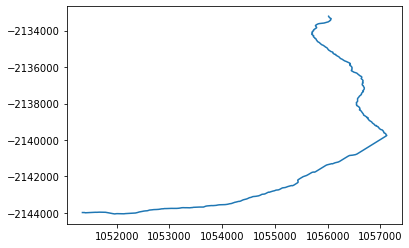

In [12]:
plt.plot(asaid_gl.geometry.iloc[0].xy[0],asaid_gl.geometry.iloc[0].xy[1])

# Make shapefile of melt area

In [19]:
nid1 = 159202
nid2 = 145074
line_name= 'line7'

path = f"/Volumes/arc_02/whitefar/DATA/REMOTE_SENSING/REMA_STRIPES/DIFFERENCES/REMA_{nid1}-{nid2}_diff.tif"
image = rio.open(path)
extent = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
gdf = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                    +line_name+".shp")
f = df.loc[nid1].acquisitio
t =df.loc[nid2].acquisitio
xmin,xmax = [gdf.geometry.x.to_numpy().min(),gdf.geometry.x.to_numpy().max()]
ymin,ymax = [gdf.geometry.y.to_numpy().min(),gdf.geometry.y.to_numpy().max()]

In [46]:
centre = Point(-380650, -725450)
buff = 900
centre_buffer = centre.buffer(buff)

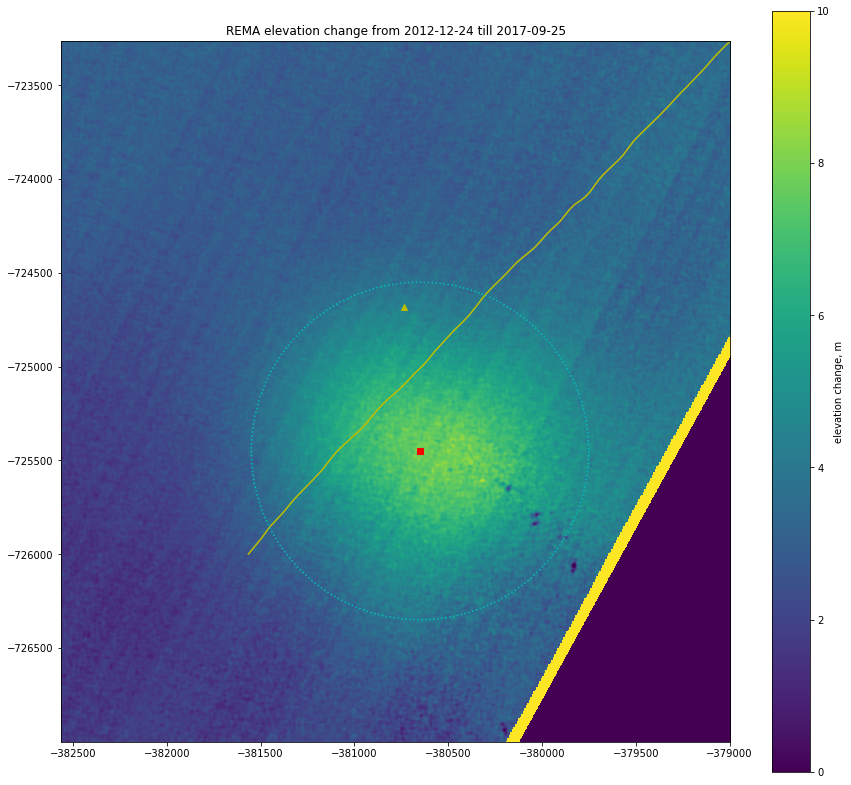

In [47]:
plt.figure(figsize=(15,14))
plt.imshow(image.read(1),extent=extent, vmin=v[0],vmax=v[1])
plt.xlim([xmin-1000, xmax])
plt.ylim([ymin-1000,ymax])
cb = plt.colorbar()
plt.plot(gdf.geometry.x,gdf.geometry.y,'y')
plt.plot(kis2[0],kis2[1],'y^')
plt.plot(centre_buffer.exterior.xy[0],centre_buffer.exterior.xy[1],'c:')
plt.plot(centre.x,centre.y,'rs')
plt.title(f'REMA elevation change from {f} till {t}')
cb.set_label('elevation change, m')

In [60]:
gdf = gpd.GeoDataFrame({"name": ['centre_buffer']}, geometry=[centre_buffer])
gdf.to_file('/Users/home/whitefar/DATA/REMOTE_SENSING/REMA_2m_strips/melt_area_REMA.shp')

In [61]:
gdf

,name,geometry
0,centre_buffer,"POLYGON ((-379750.000 -725450.000, -379754.334..."
